<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe7-CuttingToRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Programación Dinámica: Cutting To Rod**

**Entrada:** Largo de varilla $n$, vector de precios por cada medida $i=1..n$.

**Salida:**  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.



##*Descripción del problema*

El problema consiste en tener los precios de **varillas de metal** por cada pulgada, y maximizar las ganancias obtenidas de vender la *varilla*.

Hay que considerar que la *varilla* podemos cortarla en varias *varillas* más pequeñas y cada medida de la *varilla* puede tener distinto valor, porque puede que asi su precio sea mayor. Por ejemplo, una varilla de $1$ pulgada vale $€ 10$ y una de $2$ pulgadas vale $€ 11$, ¿cuál es el precio máximo que podemos obtener por una varilla de 2 pulgadas?, la respuesta es $€20$, porque, en vez de venderla a $€11$ como varilla de $2$ pulgadas, podemos cortarla para tener 2 varillas de 1 pulgada y vender cada una en $€10$ euros, maximizando las ganancias obtenidas.

Por eso, para maximizar la venta de una varilla con tamaño dado, es necesario calcular todos los posibles precios a la que podemos venderla, considerando todos los posibles cortes para obtener el máximo precio que podemos obtener al vender la *varilla*, además, hay que conseguir cuál es la mejor manera de cortar las varillas para conseguir vender al mayor precio posible.


# **2. CuttingToRod**

## **2.1. Descripción del algoritmo**

La tarea es encontrar el máximo precio por el que podemos vender una *varilla* con un tamaño dado, es decir, maximizar las ganancias al vender *varillas* teniendo el precio de cada tamaño posible.

Por ejemplo, para el conjunto de precios por tamaño tenemos $[9, 11, 20, 21, 29, 31]$ y una varilla de tamaño 4, valdría $€21$, pero podemos maximizar nuestras ganancias haciendo 3 cortes, dejando 4 *varillas* de tamaño $1$ y vendiendo cada una a su precio $€9$, ganando en total $€36$ por la misma varilla, el algoritmo nos devuelve el precio maximizado, la cantidad de varillas que quedan y la cantidad de cortes que se hizo para maximizar las ganancias.

###*Explicación de la subestructura óptima del problema.*

Si analizamos el problema y las soluciones con atención nos podemos dar cuenta de que el retorno máximo $V_n$ para una *varilla* de tamaño $n$ puede estar dado por el precio de la *varilla* completa $P_n$, o el precio de una *sub-varilla* $P_i$, más el retorno máximo $V_{n-i}$ de la *varilla* restante:

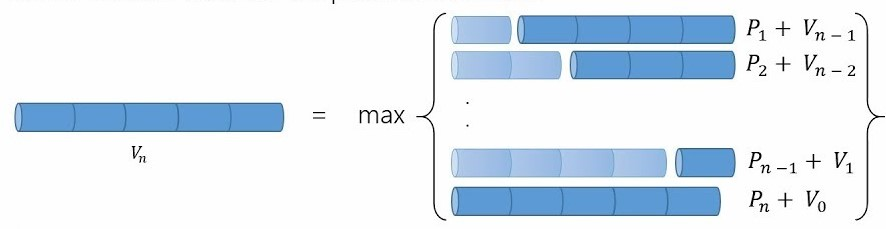

by: https://www.youtube.com/watch?v=HFPH4XGbp44 (aparece en el minuto 2:25 aproximadamente)

Una vez caracterizada la solución óptima podemos definir el valor de la solución óptima de manera recursiva:

$V_n=\max\limits_{i=1..n}(P_i+V_{n-i})$ considerando $V_0 = 0$

Esto significa que para una resolución optima del algoritmo, donde es necesario calcular los precios máximos de las *varillas* más pequeñas a la buscada para obtener el valor máximo de la varilla buscada. Viendo que hay que conseguir los problemas más pequeños antes que los más grandes:

$V_{n-i} \leftarrow {i=1...n}$

Para conseguir una solución óptima podemos realizar el siguiente acercamiento **bottom-up**:
- Ordenar los problemas por tamaño de menor a mayor.
- Guardar los resultados asociados a cada subproblema.
- Cuando se resuelva un subproblema, basta con **utilizar los resultados** de los problemas más pequeños que ya fueron resueltos con anterioridad. **No debemos volver a resolverlos**.

Este acercamiento al problema es óptimo para la resolución del problema, es decir, utilizar un algoritmo **bottom-up** es una solución óptima al problema **Cutting To Rod**.

###*Explicación de la función recursiva para el retorno máximo.*

El algoritmo recibe de entrada una lista(o arreglo) $arr$ con una secuencia de $n$ números mayores a $0$, de izquierda a derecha son los precios por los tamaños $1,2,...,n$ de una *varilla*, recibe el tamaño de la *varilla* que se desea maximizar su precio, y un arreglo que ira contando las partes en que se divide la *varilla* cada vez que se obtiene un mejor precio. 

Luego se consigue el mayor precio por el que podemos vender la *varilla* dada y la cantidad de cortes que hacerle para conseguir ese precio. En este caso describiremos la técnica algorítmica recursiva para solucionar el problema, aunque no sea la más eficiente.

1.   En cada interacción i del algoritmo, se comprueba el valor de cada tamaño de *varilla* (menor al valor dado) más el máximo valor que se puede obtener por el resto de la *varilla*, cada uno de esos precios se compara con una variable que va guardando el máximo valor encontrado, y asi saber si tenemos un nuevo valor máximo, y si hay que cambiar los cortes.

2.   El problema que afecta seriamente la eficiencia de resolver este problema de manera recursiva es que el algoritmo calcula varias veces el mismo valor, por ejemplo, calcula el precio una *varilla* de tamaño $1$ más el valor maximizado una *varilla* de tamaño $3$ (recursivamente) para maximizar el precio de *varilla* de tamaño $6$, habrá otras iteraciones donde también calcule "el valor maximizado una *varilla* de tamaño $3$" sumándolo con precios de distintos tamaños posibles de la *varilla*

3.   La línea "el máximo valor que se puede obtener por el resto de la *varilla*" es la razón de su falta de eficiencia, ya que este valor es considerado el subproblema y el algoritmo lo calcula de forma recursiva.
Es decir, calcula el mismo subproblema repetidas veces antes de obtener el resultado, y la idea de los subproblemas, es que se ejecuten una vez con utilidades para todo el algoritmo.

4.   La mayoría de los precios maximizados de *varillas* con tamaño menor al dado, calculados recursivamente, se utilizan repetidamente en varias comparaciones, pero el algoritmo recursivo nunca guarda estos valores, cada vez que son necesarios, se llama recursivamente sobre el tamaño menor dado cuyo precio maximizado necesitamos, es debido a que estos precios sin necesarios más de una vez, pero el algoritmo nunca lo guarda, causa que la resolución de forma recursiva no sea una forma óptima de resolver el problema.


## **2.2. Código**

###Util y necesario para los códigos

In [1]:
import random

def obtenerPrecios(n,lim):
    prices = []
    prev = 0
    for i in range(n):
        r = random.randint(1,lim)
        prices.append(prev+r)
        prev+=r
    return prices

###Recursivo

In [ ]:
import random

contadorRecursion = 0

def cortesVarillaRecursivo(precios, largo, cortes,verbose=False):
    if(largo <= 0):
        return 0
    maxValor = -1
    global contadorRecursion
    
    # Corte recursivamente la barra en diferentes piezas
    # y compare diferentes configuraciones
    for i in range(0, largo):
        if(i >= len(precios)): continue
        cutPrev = cortesVarillaRecursivo(precios, largo - i - 1, cortes,verbose)
        
        if verbose:
            print("---------------------------------------------") 
            print(f"Varilla de largo {largo}")
        
        contadorRecursion += 1

        if verbose: print(f"Maximo valor para el largo {largo} < precio de largo {i+1} + Maximo valor para el largo {largo-i-1}")
        if verbose: print(f"{maxValor} <  {precios[i]} + {cutPrev}")
        
        if maxValor <  precios[i] + cutPrev:
            maxValor =  precios[i] + cutPrev
            if largo > 1: 
                cortes[largo] = cortes[largo-i-1] + 1
            if verbose: print(f"El nuevo Maximo valor para el largo {largo} es {maxValor}")

    if verbose:
            print("---------------------------------------------") 
    return maxValor

n = int(input("Seleccione la cantidad de precios que se haran para cada medida de la varilla: ")) 
if n < 1: print("Cantidad de precios insuficientes"); exit(1)

precios = obtenerPrecios(n,100)
partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1

print(f"Los precios de la varilla por su cantidad de pulgadas son {precios}\n")
largoVarilla = int(input("Seleccione las pulgadas de la varilla cuyo precio desea maximizar: ")) 

maximoValor = cortesVarillaRecursivo(precios, largoVarilla,partesDividido)
print(f"El mayor precio obtenible: {maximoValor}" +
      f"\n\n# Se obtiene al cortar la varilla original en {partesDividido[largoVarilla]} subvarillas " +
      f"\n# Realiza {partesDividido[largoVarilla]-1} cortes"+ 
      f"\n# Realiza {contadorRecursion} llamadas recursivas")

Seleccione la cantidad de precios que se haran para cada medida de la varilla: 12
Los precios de la varilla por su cantidad de pulgadas son [6, 88, 160, 225, 294, 366, 392, 486, 538, 635, 646, 654]

Seleccione las pulgadas de la varilla cuyo precio desea maximizar: 3
El mayor precio obtenible: 160

# Se obtiene al cortar la varilla original en 1 subvarillas 
# Realiza 0 cortes
# Realiza 7 llamadas recursivas


###Botton-up

In [ ]:
import random

def cortesVarillaDinamica(precios, largo, cortes,verbose=False):
    valores = [0 for x in range(largo+1)]
    valores[0] = 0

    # Corte recursivamente la barra en diferentes piezas
    # y compare diferentes configuraciones
    for i in range(1, largo+1):
        if verbose:
            print("---------------------------------------------") 
            print(f"Varilla de largo {i}")
        maxValor = -100

        for j in range(i):
              if(j >= len(precios)): continue

              if verbose: 
                    print("----------------------------") 
                    print(f"Maximo valor para el largo {i} < precio de largo {j+1} + Maximo valor para el largo {i-j-1}")
                    print(f"{maxValor} <  {precios[j]} + {valores[i-j-1]}")
              if maxValor < precios[j] + valores[i-j-1]:
                  maxValor = precios[j] + valores[i-j-1]
                  if i > 1: 
                      cortes[i] = cortes[i-j-1] + 1
                  if verbose: 
                        print(f"El nuevo Maximo valor para el largo {i} es {maxValor}")
                        print("----------------------------") 
        valores[i] = maxValor
 
    return valores[largo]

n = int(input("Seleccione la cantidad de precios que se haran para cada medida de la varilla: "))
if n < 1: print("Cantidad de precios insuficientes"); exit(1)

precios = obtenerPrecios(n,100)
partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1

print(f"Los precios de la varilla por su cantidad de pulgadas son {precios}\n")
largoVarilla = int(input("Seleccione las pulgadas de la varilla cuyo precio desea maximizar: ")) 

maximoValor = cortesVarillaDinamica(precios, largoVarilla,partesDividido)
print(f"El mayor precio obtenible: {maximoValor}" +
      f"\n\n# Se obtiene al cortar la varilla original en {partesDividido[largoVarilla]} subvarillas " +
      f"\n# Realiza {partesDividido[largoVarilla]-1} cortes")

Seleccione la cantidad de precios que se haran para cada medida de la varilla: 12
Los precios de la varilla por su cantidad de pulgadas son [56, 141, 211, 310, 389, 395, 419, 471, 474, 525, 614, 625]

Seleccione las pulgadas de la varilla cuyo precio desea maximizar: 3
El mayor precio obtenible: 211

# Se obtiene al cortar la varilla original en 1 subvarillas 
# Realiza 0 cortes


## **2.3. Ejecución del algoritmo paso a paso**

Aplicando **`verbose=True`**, podemos ver lo que ocurre en cada iteración del algoritmo de **Select**.

###Recursivo

In [ ]:
import random
contadorRecursion = 0

n = random.randint(1,10)
print("Seleccione la cantidad de precios que se haran para cada medida de la barilla: ",n)

precios = obtenerPrecios(n,10)
partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1

largoVarilla = random.randint(1, n)
if largoVarilla > 5: random.randint(1, 5)

print(f"Los precios de la varilla por su cantidad de pulgadas son {precios}\n")
print(f"Seleccione las pulgadas de la varilla cuyo precio desea maximizar: {largoVarilla}")

maximoValor = cortesVarillaRecursivo(precios, largoVarilla,partesDividido,True)

print(f"\nEl mayor precio obtenible: {maximoValor}" +
      f"\n\n# Se obtiene al cortar la varilla original en {partesDividido[largoVarilla]} subvarillas " +
      f"\n# Realiza {partesDividido[largoVarilla]-1} cortes"+ 
      f"\n# Realiza {contadorRecursion} llamadas recursivas")

Seleccione la cantidad de precios que se haran para cada medida de la barilla:  4
Los precios de la varilla por su cantidad de pulgadas son [7, 16, 17, 23]

Seleccione las pulgadas de la varilla cuyo precio desea maximizar: 4
---------------------------------------------
Varilla de largo 1
Maximo valor para el largo 1 < precio de largo 1 + Maximo valor para el largo 0
-1 <  7 + 0
El nuevo Maximo valor para el largo 1 es 7
---------------------------------------------
---------------------------------------------
Varilla de largo 2
Maximo valor para el largo 2 < precio de largo 1 + Maximo valor para el largo 1
-1 <  7 + 7
El nuevo Maximo valor para el largo 2 es 14
---------------------------------------------
Varilla de largo 2
Maximo valor para el largo 2 < precio de largo 2 + Maximo valor para el largo 0
14 <  16 + 0
El nuevo Maximo valor para el largo 2 es 16
---------------------------------------------
---------------------------------------------
Varilla de largo 3
Maximo valor p

###Botton-up

In [ ]:
import random

n = random.randint(1,10)
print("Seleccione la cantidad de precios que se haran para cada medida de la barilla: ",n)

precios = obtenerPrecios(n,10)
partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1

largoVarilla = random.randint(1, n)

print(f"Los precios de la varilla por su cantidad de pulgadas son {precios}\n")
print(f"Seleccione las pulgadas de la varilla cuyo precio desea maximizar: {largoVarilla}")

maximoValor = cortesVarillaDinamica(precios, largoVarilla, partesDividido, True)

print(f"\nEl mayor precio obtenible: {maximoValor}" +
      f"\n\n# Se obtiene al cortar la varilla original en {partesDividido[largoVarilla]} subvarillas " +
      f"\n# Realiza {partesDividido[largoVarilla]-1} cortes")

Seleccione la cantidad de precios que se haran para cada medida de la barilla:  6
Los precios de la varilla por su cantidad de pulgadas son [8, 10, 11, 12, 14, 17]

Seleccione las pulgadas de la varilla cuyo precio desea maximizar: 5
---------------------------------------------
Varilla de largo 1
----------------------------
Maximo valor para el largo 1 < precio de largo 1 + Maximo valor para el largo 0
-100 <  8 + 0
El nuevo Maximo valor para el largo 1 es 8
----------------------------
---------------------------------------------
Varilla de largo 2
----------------------------
Maximo valor para el largo 2 < precio de largo 1 + Maximo valor para el largo 1
-100 <  8 + 8
El nuevo Maximo valor para el largo 2 es 16
----------------------------
----------------------------
Maximo valor para el largo 2 < precio de largo 2 + Maximo valor para el largo 0
16 <  10 + 0
---------------------------------------------
Varilla de largo 3
----------------------------
Maximo valor para el largo 3 

## **2.4. Ejemplo**

Precios = $[5,9,12]$

$n = 2$


1. Primero obtenemos los retorno máximos menores a $n$. Entonces empezamos con el tamaño $x= 1$, para eso necesitamos el retorno máximo del tamaño anterior, es decir, $x = x-1 = 0$ cuyo retorno es 0.

2. Ahora que tenemos el retorno máximo de $x = 0$, calculemos el de $x=1$, para eso se compara el precio de $i=1...x$ con retorno máximo $j=x-1...0$ de tal forma que $i+j=x$, entonces solo hay 1 valor posible para $i,j → i=1,j=0$.

3. Con eso tenemos que el retorno máximo para $x=1$ es el precio de tamaño $1$ más el retorno máximo de tamaño $0$, es decir, $5+0=5$.

4. Ahora hacemos los mismo con el tamaño $2$.

5. Ahora que tenemos el retorno máximo de $x_1 = 0$ y $x_2=1$, calculemos el de $x=2$, para eso se compara el precio de $i=1...x$ con retorno máximo $j=x-1...0$ de tal forma que $i+j=x$, entonces solo hay 2 valores posible para $i,j → i=1,j=1$ u $i=2,j=0$.

5. Si $i,j → i=1,j=1$ entonces el precio seria $5+5=10$, mientras que en el caso $i,j → i=2,j=0$ seria $9+0=9$. El más grande es cuando se divide en $2$ varillas de tamaño $1$, la cantidad de cortes para que un tamaño $2$ se transforme en 2 de tamaño $1$ es un corte en la mitad.


retorno máximo = $10$

cantidad de cortes = $1$

sub-varillas totales = $2$


# **3. Correctitud**

## **bottom-up**

### **Teorema (Correctitud).**

El algoritmo entrega el máximo retorno posible de una *varilla* de tamaño $n$.

### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para el algoritmo `Cutting To Rod`:

> Al comienzo de cada iteración $i$ del bucle más grande, tendremos el máximo retorno de la *varilla* de largo $i=i-1...0$ calculado y guardado.

#### **Inicialización**

Al comienzo de la primera iteración $i=1$, tendremos el máximo retorno de la varilla $i-1=0$ lo cual es cierto, pues independientemente de los precios aplicados, una varilla de largo $0$ siempre valdrá $0$.

#### **Mantención**

Aplicando inducción, asumimos que al comienzo de cada iteración  se cumple la propiedad. Es decir, en la iteración $i$ tenemos el retorno máximo para los problemas $i=i-1...0$ calculado.

Consideremos que $i=x$ como el tamaño del problema con $x < n$.

Dentro del bucle más pequeño, se ira obteniendo el precio de *varilla* de tamaño $a$ + *retorno máximo* del tamaño $b$ de tal manera que $a+b=x$. A medida que el tamaño de la *varilla* ($a$) aumenta, el *retorno máximo* con el que se suma disminuye, cada iteración del segundo bucle se compara la suma con el valor máximo guardado, y se reemplaza si es mayor, de esa manera tendremos el *retorno máximo* para el tamaño $x$.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.

####**Correctitud**

Finalmente, como la **propiedad de bucle invariante** es verdadera al incio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $n$-ésima iteración del algoritmo, se obtendra el retorno maximo de una varilla de largo $n$.

# **4. Tiempo de ejecución**

Este tiempo de ejecución es en base a que el algoritmo retorna el retorno máximo, no tiene en cuenta el cálculo de la cantidad de cortes.

##**Bottom-up**

###*Teorema (Complejidad Temporal).*

*El algoritmo `Cutting To Rod` implementado a traves de **Bottom-up** tiene un **tiempo de ejecución** de $O(n^2)$.*

####*Prueba del teorema.*

#####Lógica

Para la resolución de este problema tenemos 2 bucles, el bucle grande es para recorrer los subproblemas a resolver antes de ser capaz de resolver el problema real (refiriéndose al aquellos problemas con menor tamaño al pedido).

Cada problema tiene en cuenta que tenemos el retorno máximo de sus subproblemas (el problema para cualquier tamaño menor al pedido). Y con ese dato, dentro del bucle chico se resuelve el problema en un tiempo de ejecución $n-1 \rightarrow O(n)$. 

Para el retorno máximo del tamaño pedido se deben resolver $n-1$ subproblemas antes de resolver el problema real.

El problema real también tiene un tiempo de ejecución $n-1 \rightarrow O(n)$.

Entonces se trata de resolver $n$ veces un problema con tiempo de ejecución $O(n)$. Por eso el algoritmo **bottom-up** para resolver `CuttingToRod` es de $n * (n-1) → O(n^2)$.

#####Problema matemático

Podemos ver el tiempo de ejecución de todos los subproblemas como sumatoria, debemos resolver todos los subproblemas de tamaño $j=0...n-1$, el total de tiempo de ejecución de los subproblemas seria la suma de todos los subproblemas.

Cada subproblema tiene tiempo de ejecución $T_{sub}(n) = n$.

$\displaystyle \sum_{j=0}^{n-1}T_{sub}(j) = \frac{(n-1)(n-2)}{2} = \frac{n^2 - 3n + 2}{2} → O(n^2)$.

Y el tiempo de ejecución del problema sería el de los subproblemas más $n$ (siendo $n$ el tiempo del problema con los subproblemas resueltos).

$T(n) = \displaystyle \sum_{j=0}^{n-1}T_{sub}(j) + n = \frac{(n-1)(n-2)}{2} + n= \frac{n^2 - 3n + 2}{2} + n = \frac{n^2 - n + 2}{2} → O(n^2)$.

###*Teorema (Complejidad Espacial)*.

*El algoritmo `Cutting To Rod` implementado a traves de **Bottom-up** tiene un **almacenamiento usado** de $O(n)$.*

####*Prueba del teorema.*

Para la resolución de este problema, además de los datos necesario que deben ser proporcionados, se debe crear un arreglo de valores $V$ de tamaño $n+1$, donde se irán guardando los retornos máximos de cada subproblema}.

Por ejemplo, en el cuando tengamos el tamaño $x=4$, guardaremos su retorno máximo en $V_4$ para su posterior uso cuando tengamos $x=x+1$.

Por eso la memoria extra que requiere el problema es de $n+1 \rightarrow O(n)$.


# **5. Experimentos**

## **5.1. Cutting To Rod: Recursivo vs Bottom-up** (Tiempo de ejecución)

### **Comparación de Gráficas** (Tiempo de ejecución)

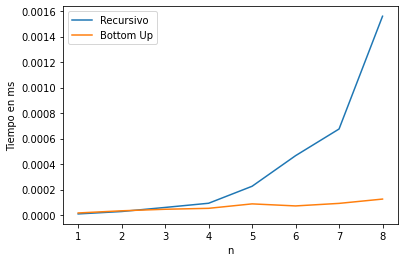

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(1,9):
    prices = obtenerPrecios(n,20)
    parts = [0 for x in range(n+1)]
    parts[1] = 1
    size = n

    #la función repeat está ejecutando 5 veces cortesVarillaDinamica y cortesVarillaRecursivo con el arreglo a y retorna el mejor tiepo obtenido.
    t1 = repeat(setup="from __main__ import cortesVarillaDinamica", stmt=f"cortesVarillaDinamica({prices}, {size},{parts})", repeat=1, number=5)
    t = repeat(setup="from __main__ import cortesVarillaRecursivo", stmt=f"cortesVarillaRecursivo({prices}, {size},{parts})", repeat=1, number=5)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Recursivo", "Bottom Up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

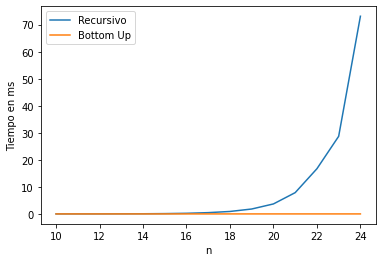

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(10,25):
    prices = obtenerPrecios(n,20)
    parts = [0 for x in range(n+1)]
    parts[1] = 1
    size = n

    #la función repeat está ejecutando 5 veces cortesVarillaDinamica y cortesVarillaRecursivo con el arreglo a y retorna el mejor tiepo obtenido.
    t1 = repeat(setup="from __main__ import cortesVarillaDinamica", stmt=f"cortesVarillaDinamica({prices}, {size},{parts})", repeat=1, number=5)
    t = repeat(setup="from __main__ import cortesVarillaRecursivo", stmt=f"cortesVarillaRecursivo({prices}, {size},{parts})", repeat=1, number=5)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Recursivo", "Bottom Up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Previamente vimos que **bottom-up** es una solución óptima para este algoritmo, mientras que solucionarlo **recursivamente** no es una estrategia óptima ni eficiente.

Como cabria de esperar, resolver el problema con **bottom-up** es más rápido que usando **recursividad**, y esta diferencia de velocidad se hace mucho mayor a medida que aumenta el tamaño de la *varilla* cuyo precio buscamos maximizar teniendo el precio de cada *varilla* con medida igual o inferior. Tanto es asi que basta con ver con varillas con menos de $100$ de largo, pues la diferencia ya es enorme con *varillas* de tamaño menor a $30$.

Esto puede deberse a la poca eficiencia que presenta la **recursividad** en este problema, pues para la solución de calcular la máxima ganancia que se puede obtener de una varilla de tamaño $n$ necesitamos la máxima ganancia que se puede obtener de todas las varillas de tamaño menor a $n$ y esa información la requerimos varias veces en diferentes tiempos.

La **forma recursiva** de este algoritmo, realiza un mismo subproblema (calcular el retorno máximo de una varilla de menor tamaño al pedido) repetidas veces, mientras que el **bottom-up** realiza cada subproblema una vez, partiendo desde el menor, y los guarda para usarlo en las varillas de tamaño mayor.

## **5.2. Bottom-up : Cantidad de problemas**

Primero tenemos que el problema tiene un tiempo de ejecución $O(n^2)$.

En el tiempo de ejecución vimos que los subproblemas son iguales al tiempo de ejecución del problema con $n = n-1$, es decir, en relación con el problema, el tiempo de ejecución de los subproblemas en $O({(n-1)}^{2})$. Eso es para resolver $n-1$ subproblemas de tiempo $T_{sub}(n)=n$.

Con esto podemos decir que la cantidad de problemas aumenta en la misma cantidad que el tamaño del problema.


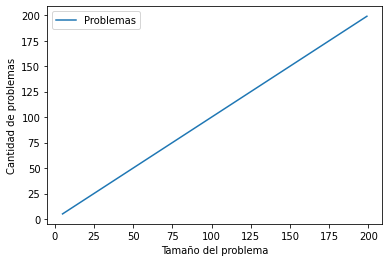

In [7]:
import matplotlib.pyplot as plt

y1=[n for n in range(5,200)] # Cantidad de problemas
x=[n for n in range(5,200)]

plt.plot(x,y1)
plt.legend(["Problemas"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Cantidad de problemas')
plt.show()

### **Análisis de resultados**

Podemos ver que la cantidad de problemas a resolver crece de forma lineal relacionada al tamaño del problema, esto debido a que la forma bottom-up calcula los subproblemas 1 vez, y se realiza en orden ascendente, haciendo que el problema solo sea un problema más al de la cantidad de subproblemas, pues cada uno tarda lo mismo individualmente (contando con los subproblemas de cada problema resueltos previamente).